**Choose proper tutors for math exam**

In [107]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
import random

**original data**

In [162]:
train = pd.read_csv('train.csv', index_col = 0)  
train.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
Id,,,,,,,,,,,,
0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [163]:
test_original = pd.read_csv('test.csv', index_col = 0)  
test_original.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
Id,,,,,,,,,,,
10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


**checking data for outliers**

In [164]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
choose                 10000 non-null int64
dtypes: float64(11), int64(1)
memory usage: 1015.6 KB


In [165]:
train.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


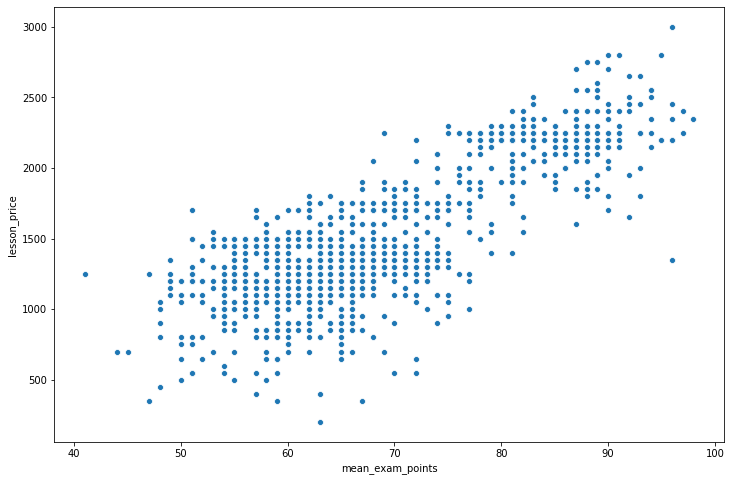

In [166]:
plt.figure(figsize=(12,8))
sns.scatterplot(train[(train['choose']==1)]['mean_exam_points'], train[(train['choose']==1)]['lesson_price'] )
plt.show()

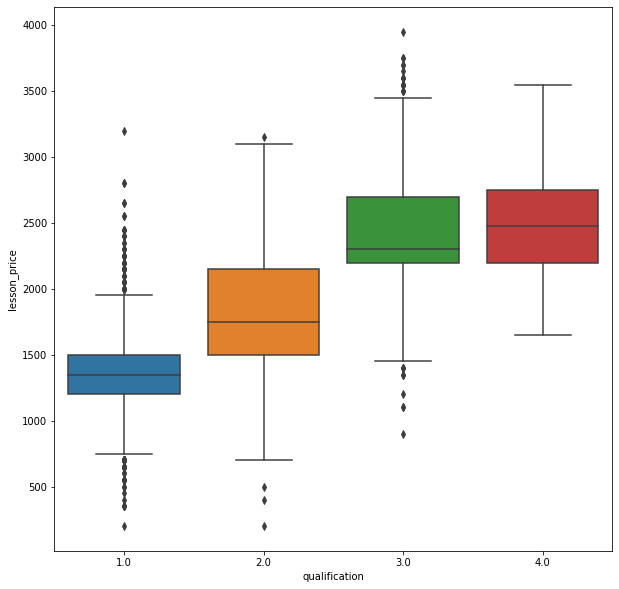

In [167]:
plt.figure(figsize=(10,10))
sns.boxplot(train.qualification, train.lesson_price)

In [114]:
Q3 = train[(train['qualification']==1)]['lesson_price'].quantile(0.75)
Q1 = train[(train['qualification']==1)]['lesson_price'].quantile(0.25)
IQR = Q3 - Q1

In [115]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
train[(train['qualification']==1)] = train[(train['qualification']==1)].query('lesson_price <= (@Q3 + 1.5 * @IQR)')

In [116]:
Q3 = train[(train['qualification']==2)]['lesson_price'].quantile(0.75)
Q1 = train[(train['qualification']==2)]['lesson_price'].quantile(0.25)
IQR = Q3 - Q1

In [117]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
train[(train['qualification']==2)] = train[(train['qualification']==2)].query('(@Q1 - 1.5 * @IQR) <= lesson_price <= (@Q3 + 1.5 * @IQR)')

In [118]:
Q3 = train[(train['qualification']==3)]['lesson_price'].quantile(0.75)
Q1 = train[(train['qualification']==3)]['lesson_price'].quantile(0.25)
IQR = Q3 - Q1

In [119]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
train[(train['qualification']==3)] = train[(train['qualification']==3)].query('(@Q1 - 1.5 * @IQR) <= lesson_price <= (@Q3 + 1.5 * @IQR)')

In [120]:
Q3 = train[(train['qualification']==4)]['lesson_price'].quantile(0.75)
Q1 = train[(train['qualification']==4)]['lesson_price'].quantile(0.25)
IQR = Q3 - Q1

In [121]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
train[(train['qualification']==4)] = train[(train['qualification']==4)].query('(@Q1 - 1.5 * @IQR) <= lesson_price <= (@Q3 + 1.5 * @IQR)')

In [122]:
train = train[train['lesson_price'].notna()]

**Split train dataset on features and answers**

In [168]:
y = train['choose']
y.head()

Id
0    0
1    1
2    0
3    1
4    0
Name: choose, dtype: int64

In [169]:
y = pd.DataFrame.to_numpy(y)

In [170]:
train.drop(columns=['choose'])

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
Id,,,,,,,,,,,
0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0
1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0
2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0
3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0
4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,55.0,2.0,2150.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,79.0
9996,53.0,2.0,1350.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
9997,44.0,5.0,1750.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,59.0


In [171]:
train.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
Id,,,,,,,,,,,,
0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


**Check features' correlation**

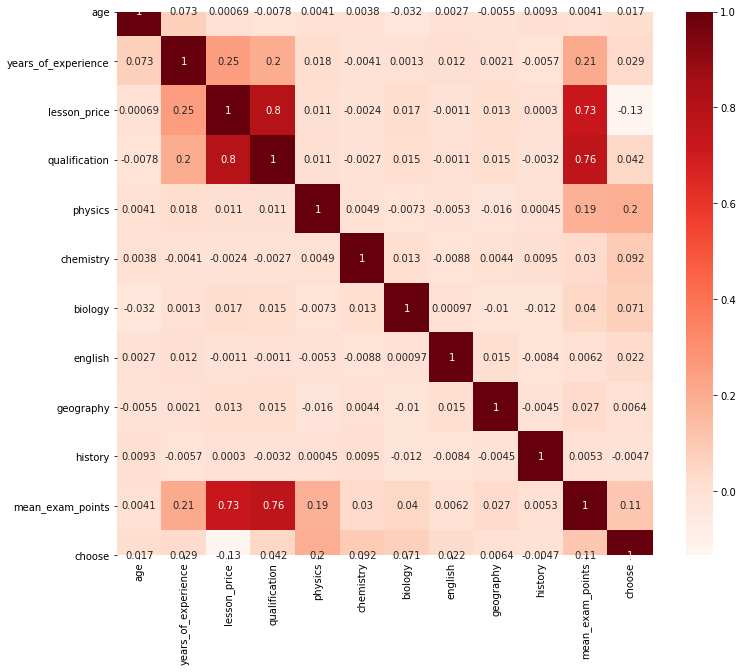

In [172]:
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [173]:
train = train[['lesson_price', 'years_of_experience','qualification','physics', 'english', 
               'age', 'mean_exam_points','chemistry']]

In [174]:
train = pd.DataFrame.to_numpy(train)

**Features' standardization**

In [175]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(train, axis=0)
stds = np.std(train, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(train.shape[0]):
    for j in range(train.shape[1]):
        train[i][j] = (train[i][j] - means[j])/stds[j]

**Split the dataset on training and testing subsets for 75 to 25%**

In [176]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.25)

**Implement $N$ bootstraps' samples and features' subsamples to find a split in the node**

In [177]:
random.seed(42)

def get_bootstrap(data, labels, N):
    n_samples = data.shape[0]
    bootstrap = []
    
    for i in range(N):
        b_data = np.zeros(data.shape)
        b_labels = np.zeros(labels.shape)
        
        for j in range(n_samples):
            sample_index = random.randint(0, n_samples-1)
            b_data[j] = data[sample_index]
            b_labels[j] = labels[sample_index]
        bootstrap.append((b_data, b_labels))
        
    return bootstrap

In [178]:
def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = [i for i in range(len_sample)]
    
    len_subsample = int(np.sqrt(len_sample))
    subsample = []
    
    random.shuffle(sample_indexes)
    for _ in range(len_subsample):
        subsample.append(sample_indexes.pop())
        
    return subsample

In [179]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [180]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction

In [181]:
#Расчет критерия Джини

def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [182]:
# Расчет качества

def quality(left_labels, right_labels, current_gini):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [183]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [184]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    # выбор индекса из подвыборки длиной sqrt(n_features)
    subsample = get_subsample(n_features)
    
    for index in subsample:
        t_values = [row[index] for row in data]
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [185]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels):

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

**Random forest generation function**

In [186]:
def random_forest(data, labels, n_trees):
    forest = []
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    for b_data, b_labels in bootstrap:
        forest.append(build_tree(b_data, b_labels))
        
    return forest

In [187]:
# Функция классификации отдельного объекта

def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [188]:
# функция формирования предсказания по выборке на одном дереве

def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [189]:
# предсказание голосованием деревьев

def tree_vote(forest, data):

    # добавим предсказания всех деревьев в список
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
    
    # сформируем список с предсказаниями для каждого объекта
    predictions_per_object = list(zip(*predictions))
    
    # выберем в качестве итогового предсказания для каждого объекта то,
    # за которое проголосовало большинство деревьев
    voted_predictions = []
    for obj in predictions_per_object:
        voted_predictions.append(max(set(obj), key=obj.count))
        
    return voted_predictions

In [190]:
# Введем функцию подсчета точности как доли правильных ответов

def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [191]:
def r2_score(y_real, prediction):
    mean_number = sum(y) / len(y)
    ssreg = (sum((prediction - mean_number)**2)) 
    sstot = (sum((y_real - mean_number)**2))
    
    return round(ssreg / sstot, 3)

In [192]:
n_trees = 15
my_forest_10 = random_forest(X_train, y_train, n_trees)

In [193]:
# Получим ответы для обучающей выборки 
train_answers = tree_vote(my_forest_10, X_train)

In [194]:
# И получим ответы для тестовой выборки
test_answers = tree_vote(my_forest_10, X_test)

In [195]:
# Точность на обучающей выборке
train_accuracy = accuracy_metric(y_train, train_answers)
print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy:.3f}, r2 = {r2_score(y_train, train_answers)}')

Точность случайного леса из 15 деревьев на обучающей выборке: 90.200, r2 = 0.26


In [196]:
# Точность на тестовой выборке
test_accuracy = accuracy_metric(y_test, test_answers)
print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy:.3f}, r2 = {r2_score(y_test, test_answers)}')

Точность случайного леса из 15 деревьев на тестовой выборке: 89.560, r2 = 0.266


**Make adjustments for test_original data**

In [197]:
#test_original['price_per_point'] = test_original['lesson_price']/test_original['mean_exam_points']

In [198]:
test_original = test_original[['lesson_price', 'years_of_experience','qualification','physics', 'english', 
               'age', 'mean_exam_points','chemistry']]

In [199]:
test = pd.DataFrame.to_numpy(test_original)

**Standardization**

In [200]:
# мастабируем тест к тому же масштабу, что трейн, поэтому тест надо преобразовать, используя те же means и stds
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(test.shape[0]):
    for j in range(test.shape[1]):
        test[i][j] = (test[i][j] - means[j])/stds[j]

In [201]:
# Получим окончательные ответы
final_answers = tree_vote(my_forest_10, test)

In [202]:
test = pd.DataFrame({'Id': test_original.index,
                       'choose': final_answers})

In [203]:
test

,Id,choose
0,10000,0.0
1,10001,0.0
2,10002,0.0
3,10003,0.0
4,10004,0.0
...,...,...
9995,19995,0.0
9996,19996,0.0
9997,19997,0.0
9998,19998,1.0


In [204]:
test.loc[:, ['Id', 'choose']].to_csv('choose_tutor.csv', float_format='%.1f', index = False)